In [3]:
import mne
# Load the EDF file, excluding the EOGs and EKG channels
raw = mne.io.read_raw_edf('20210718191232_Patient02_Iter01.edf', preload=True, exclude=['EOG1', 'EOG2', 'EKG'])
raw.resample(100)                      # Downsample the data to 100 Hz
raw.filter(0.1, 40)                    # Apply a bandpass filter from 0.1 to 40 Hz
#raw.pick_channels(['C4-A1', 'C3-A2'])  # Select a subset of EEG channels

Extracting EDF parameters from h:\MSc2\EEG\eegspectrum\20210718191232_Patient02_Iter01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 91999  =      0.000 ...   183.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (33.010 sec)



<RawEDF | 20210718191232_Patient02_Iter01.edf, 33 x 18400 (184.0 s), ~4.7 MB, data loaded>

In [4]:
# Extract the data and convert from V to uV
data = raw._data * 1e6
sf = raw.info['sfreq']
chan = raw.ch_names

# Let's have a look at the data
print('Chan =', chan)
print('Sampling frequency =', sf, 'Hz')
print('Data shape =', data.shape)

Chan = ['P7', 'P4', 'Cz', 'Pz', 'P3', 'P8', 'O1', 'O2', 'Ch9', 'Ch10', 'Ch11', 'Ch12', 'Ch14', 'Ch15', 'Ch16', 'Ch18', 'Ch19', 'Ch20', 'Ch21', 'Ch22', 'Ch23', 'Ch24', 'Ch25', 'Ch26', 'Ch27', 'Ch28', 'Ch29', 'Ch30', 'Ch31', 'Ch32', 'X', 'Y', 'Z']
Sampling frequency = 100.0 Hz
Data shape = (33, 18400)


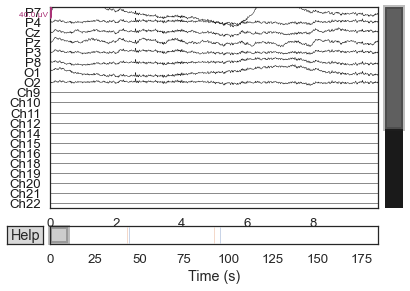

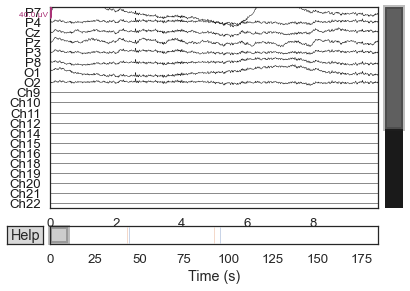

In [12]:
raw.plot()